# Finding Patterns in Datasets

**instant** - No.of Records

**dteday**  - Instant Recorded date

**Season**  - season column catogorised by 4 season
<br>1 - winter
<br>2 - spring
<br>3 - summer
<br>4 - fall

**yr**      - year column categorised by 2 years. Here we have taken two years data only.
<br>0 - 2011 : beginning year start with zero because of python count by zero.
<br>1 - 2012

**mnth**    - Every year month should have 12 months. Next year will be starting again by Number 1 - 12.

**hr**      - If you see data hr = 5, that would be 5 AM. wind speed has been calculated by 24 hours.

**holiday** -	1 - Holiday,  0 - Non-Holiday

**weekday** -	(0 - 6)/sun - sat

**workingday** - 	1 - workingday,  0 - Non-workingday


**temp**	        - temperature has been calculated between -1 to 1


**hum**	            - Humidity lies between -1 to 1

**windspeed**   - Hourly measurements of wind speed at a particular weather-recording station in Washington, DC
 <br>0 - represents no wind.
 <br>1 - represents a fast wind speed.	

**casual**	        - bikes without registering, and their bike use is recorded in the casual column

**registered**	    - People who register with our service to get discounts and benefits are registered users, and their bike
use is recorded in the registered column

**count**           - The sum of the casual and registered columns is the total count of users during each hour, and it’s recorded in the count column.

# Displaying Data Using Pandas


**CSV_file** - \Users\SANJAY\Python Online Class Topics\hour.csv

In [1]:
import pandas as pd # load pandas library

hour=pd.read_csv('/Users/SANJAY/Python Online Class Topics/Data_Science_Projects/hour.csv') # reading csv file from directory

print(hour.head()) # head command returns only the dataset’s first five rows.

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


# Calculating Summary Statistics

### Find basic Statistic calculations

**mean**   - To find Average

**median** - To find middle number

**std**    - standard deviation is a measurement of how far spread out a set of numbers is. It’s useful to help us understand the amount of variation that exists in ridership counts between hours in our data

**min**    - To find minimum

**max**    - To find maximum

In [2]:
print(hour['count'].mean())
print("\n")
print(hour['count'].median())
print("\n")
print(hour['count'].std())
print("\n")
print(hour['count'].min())
print("\n")
print(hour['count'].max())
print("\n")
print(hour.describe())

189.46308763450142


142.0


181.38759909186527


1


977


          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std      

#### describe()

You can see that describe() provides an entire table to us, and this table contains several useful metrics, including 
the mean, minimum, and maximum of each of our variables. The output of describe() also contains percentiles. 
The 25% row, for example, contains the 25th percentile of each variable in the hour data. 
We can see that the 25th percentile of the count variable is 40, meaning that 25 percent of the hours in our dataset had 40
users or fewer, while 75 percent had more than 40 users.

<br>

**Result** <br>
we’ve seen that in the first 24 hours of our data, rider numbers at night are much lower than rider numbers during the day. We’ve also seen a wide variation in the hourly count of users: 25 percent of hours have fewer than 40 riders, but one hour had 886 riders.

# Analyzing Subsets of Data

## Nighttime Data

lower prices at night to increase nighttime ridership

In [3]:
# loc() - location method allows us to specify a subset of our full data 

print(hour.loc[3,'count']) # loc[<row>,<column>]
print("\n")
print(hour.loc[2:4,'registered']) # 2:4 range of rows 2 to 4
print("\n")

# let’s look at all the nighttime observations in our data

# Average registered users used bike in time between 0 to 4 AM
print(hour.loc[hour['hr']<5,'registered'].mean()) 
print("\n")

# To compare average ridership on cold early mornings with average ridership on warm early mornings.

# Average bike users in time between 0AM to 4 AM and users count when temparature less than 0.50 with hours colder temperatures
print(hour.loc[(hour['hr']<5) & (hour['temp']<.50),'count'].mean())
print("\n")

# Average bike users in time between 0AM to 4 AM and users count when temparature greater than 0.50 hours with warmer temperatures
print(hour.loc[(hour['hr']<5) & (hour['temp']>.50),'count'].mean())
print("\n")

# To find Average ridership count for rows with either high temperatures or high humidity
print(hour.loc[(hour['temp']>0.50) | (hour['hum']>0.50),'count'].mean())

13


2    27
3    10
4     1
Name: registered, dtype: int64


20.7881427367238


19.521104742053154


33.639322916666664


193.36764103264582


# Seasonal Data
The season variable records **1 for winter**, **2 for spring**, **3 for summer**, and **4 for fall**.

In [4]:
# groupby()

# I want to show season wise ridership count

# print(hour.groupby(['season'])['count'].mean())
print(hour.groupby(['season'])['count'].mean())

print(
"""
Result:

Interpreting this output is straightforward: in the first season (winter), 
average ridership per hour is about 111.115; in the second season (spring),
average ridership per hour is about 208.344; and so on. 
A definite seasonal pattern exists: 
higher ridership in the spring and summer seasons, and lower ridership in the fall and winter.
"""
)

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

Result:

Interpreting this output is straightforward: in the first season (winter), 
average ridership per hour is about 111.115; in the second season (spring),
average ridership per hour is about 208.344; and so on. 
A definite seasonal pattern exists: 
higher ridership in the spring and summer seasons, and lower ridership in the fall and winter.



In [5]:
# 0 - Non-holiday
# 1 - Holiday

# To find holiday wise users count based on seasons
print(hour.groupby(['season','holiday'])['count'].mean())

print(
"""
Result:

Interpreting this output is straightforward: 
As expected Season 1,2,4 comparatively Non-holiday users count higher than holiday 
but we can see season 3 non-holiday users count slightly lesser than holiday user count.
"""
)



season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

Result:

Interpreting this output is straightforward: 
As expected Season 1,2,4 comparatively Non-holiday users count higher than holiday 
but we can see season 3 non-holiday users count slightly lesser than holiday user count.



# Visualizing Data with Matplotlib

### Drawing and Displaying a Simple Plot


import matplotlib.pyplot as plt

**axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(10, 6))**


**nrows and ncols**: These parameters specify the number of rows and columns of subplots in the figure, respectively. For example, subplots(nrows=2, ncols=3) will create a 2x3 grid of subplots with 2 rows and 3 columns.

**sharex and sharey**: These parameters control sharing of the x-axis and y-axis among the subplots. You can set them to 'all', 'row', 'col', or 'none', depending on how you want to share the axes. For example, subplots(nrows=2, ncols=2, sharex='all', sharey='row') will share the x-axis among all subplots and share the y-axis among subplots in the same row.

**figsize**: This parameter specifies the size of the figure in inches, as a tuple of width and height. For example, subplots(nrows=2, ncols=2, figsize=(10, 6)) will create a figure with a width of 10 inches and a height of 6 inches.

**squeeze**: This parameter controls the squeezing of the subplots. If squeeze=True (default), the subplots are squeezed to eliminate empty spaces. If squeeze=False, the subplots are not squeezed and the empty spaces are preserved.

**subplot_kw**: This parameter is a dictionary of keyword arguments that are passed to the add_subplot() function for each subplot. You can use it to customize the appearance of individual subplots, such as setting titles, labels, or other properties.

**gridspec_kw**: This parameter is a dictionary of keyword arguments that are passed to the GridSpec instance used to create the subplots. You can use it to customize the layout of subplots, such as setting the spacing between subplots, or specifying a different grid arrangement.

### Scatter plot

Scatter plots are used in data visualization to display the relationship between two continuous variables. They are particularly useful for identifying patterns, trends, or outliers in the data. Scatter plots allow us to visually examine the distribution and correlation between two variables, which can help in understanding the underlying data and making meaningful insights.


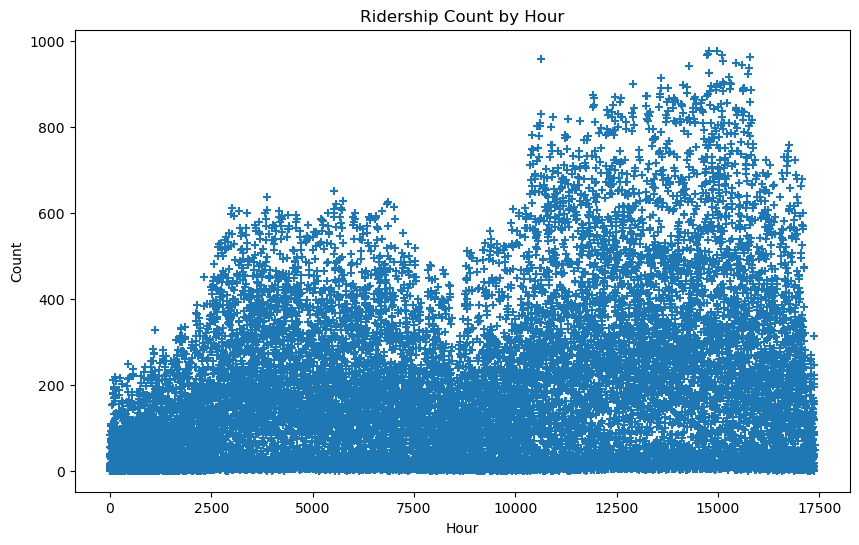

In [6]:
import matplotlib.pyplot as plt

# fig - create new figure
# fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(10, 6))

fig, ax = plt.subplots(figsize=(10,6))

# scatter(x, y, c=colors, s=sizes, marker='o', alpha=0.5, cmap='viridis', label='Scatter Plot')

# cmap: This parameter specifies the colormap to be used when mapping values to colors.You can set it to a string representing the name of a colormap, such as 'viridis', 'cividis', 'coolwarm', etc.
# alpha: This parameter controls the transparency of the dots in the scatter plot. You can set it to a scalar value between 0 and 1, where 0 is fully transparent and 1 is fully opaque. For example, alpha=0.5 will set the dots to be 50% transparent.

ax.scatter(x=hour['instant'], y= hour['count'],  marker='+')

# Clarifying Plots with Titles and Labels

plt.xlabel("Hour") # x-axis label
plt.ylabel("Count") # y-axis label
plt.title("Ridership Count by Hour") # Title of the chart 
plt.show()


### Plotting Subsets of Data

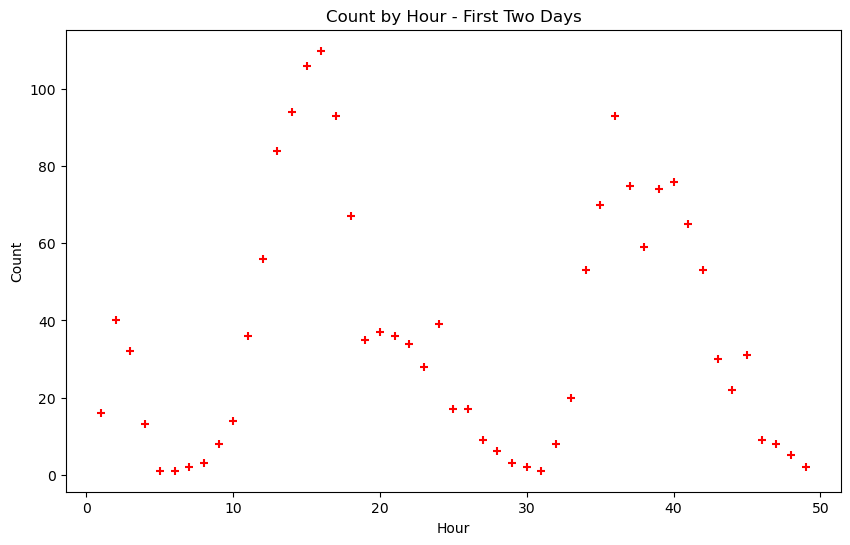

In [7]:
hour_first48 = hour.loc[0:48,:]
# 0:48 range of rows 0 to 47
#(:) - a colon alone placed there tells pandas that we want to select every column of the dataset, so we don’t need to write out each column name individually

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=hour_first48['instant'], y= hour_first48['count'],marker='+',c='red')

plt.xlabel("Hour") # x-axis label
plt.ylabel("Count") # y-axis label
plt.title("Count by Hour - First Two Days") # Title of the chart 
plt.show()



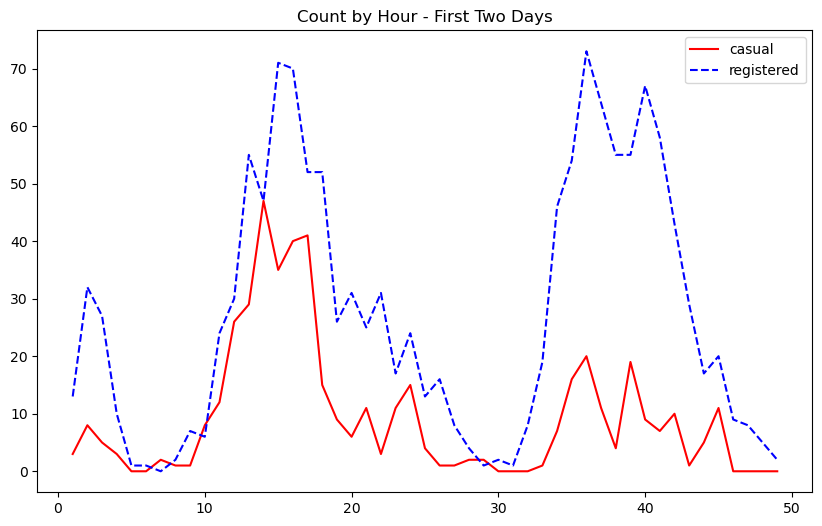

In [8]:
# A line plot showing casual and registered riders over the first two days

# In this case, we use ax.plot() instead of ax.scatter() to draw the plot.The ax.plot() method allows us to draw a line plot.
hour_first48 = hour.loc[0:48,:]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hour_first48['instant'],hour_first48['casual'], c='red',label='casual',linestyle='-')
ax.plot(hour_first48['instant'],hour_first48['registered'],c='blue',label='registered',linestyle='--')
                                                   
ax.legend()
plt.title("Count by Hour - First Two Days") # Title of the chart 
plt.show()

### Box plot

A box plot
is a simple kind of plot, but one that gives a great deal of information. In a box plot, the upper and lower horizontal boundaries of each rectangle represent the 75th and 25th percentiles of the plotted data, respectively. The horizontal line inside the rectangle represents the median (or 50th percentile). The vertical lines extending from the top and bottom of each
rectangle represent the full range of all observations that are not considered outliers. The individually drawn points beyond the ranges of the vertical lines are regarded as outliers.

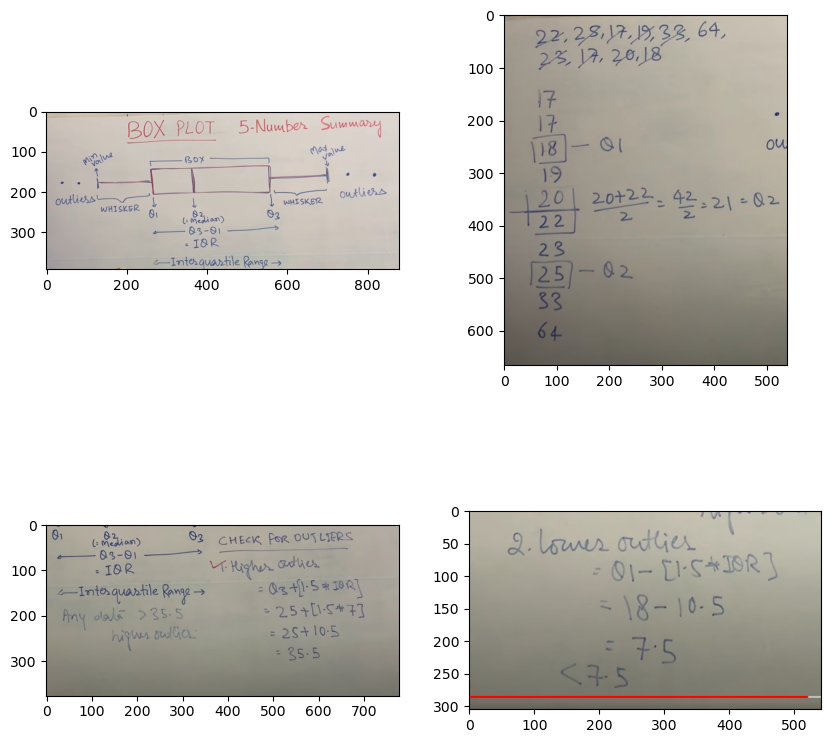

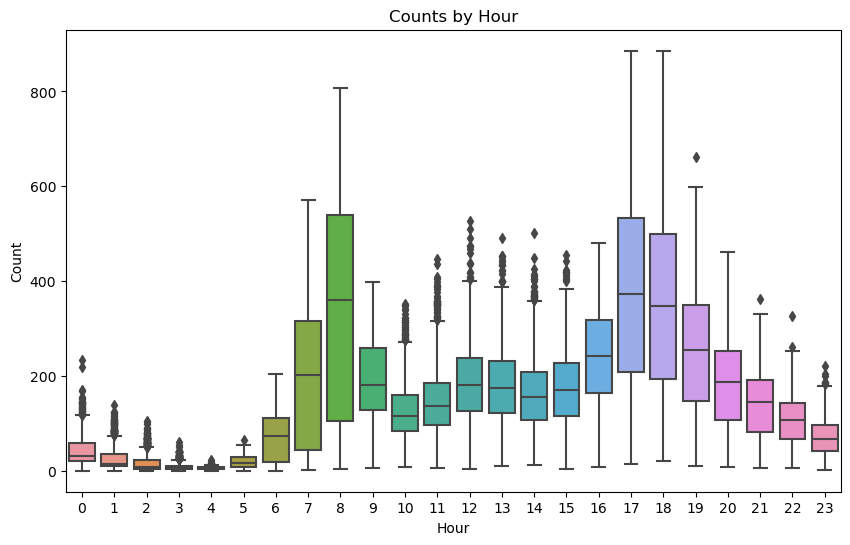

Result:

the median ridership during
hour 5 (around 5 AM) is quite low, but the median ridership at hour 6
(around 6 AM) is much higher. At hour 7 (around 7 AM), the median
ridership is higher still. High ridership occurs again around 5 PM and 6 PM;
maybe these peaks indicate that many of your customers use your bikes to
commute to and from work.



In [9]:
# Box plots showing ridership counts grouped by the hour of the day
import matplotlib.pyplot as plt
from skimage.io import imread
# Original Image
img1 = imread('/Users/SANJAY/Python Online Class Topics/Data_Science_Projects/Box_plot/Boxplot.png')
img2 = imread('/Users/SANJAY/Python Online Class Topics/Data_Science_Projects/Box_plot/Boxplot2.png')
img3 = imread('/Users/SANJAY/Python Online Class Topics/Data_Science_Projects/Box_plot/Boxplot3.png')
img4 = imread('/Users/SANJAY/Python Online Class Topics/Data_Science_Projects/Box_plot/Boxplot4.png')

fig, axes = plt.subplots(2,2,figsize=(10, 10))
axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)
axes[1,1].imshow(img4)
plt.show()


import seaborn as sns
# seaborn. 
# This package is based on Matplotlib, so it includes all the capabilities of Matplotlib, 
# plus more features that help create beautiful, informative plots quickly

fig, ax = plt.subplots(figsize = (10,6))
# ax.boxplot([x, y, data='hour'],  # Data to be plotted
#            vert=True,             # Vertical boxes
#            notch=True,            # Display notches around medians
#            whis=1.5,              # Use 1.5 times the interquartile range for whiskers
#            labels=['Data 1', 'Data 2', 'Data 3'],  # Labels for the boxes
#            meanline=True,         # Display mean line
#            showfliers=True,       # Display outliers
#            patch_artist=True,     # Fill boxes with colors
#            meanprops={'color': 'red', 'linestyle': 'dashed', 'linewidth': 2},  # Customize mean line
#            boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue'},  # Customize box color
#            whiskerprops={'color': 'gray', 'linestyle': 'dotted'},      # Customize whisker color
#            capprops={'color': 'black'},                                # Customize cap color
#            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'})  # Customize outlier marker

sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

print("""Result:\n\nthe median ridership during
hour 5 (around 5 AM) is quite low, but the median ridership at hour 6
(around 6 AM) is much higher. At hour 7 (around 7 AM), the median
ridership is higher still. High ridership occurs again around 5 PM and 6 PM;
maybe these peaks indicate that many of your customers use your bikes to
commute to and from work.
""")


### Histogram 

A histogram is a graphical representation of the distribution of a dataset. It is a common way to visualize the underlying frequency distribution of data points in a continuous or discrete dataset. In Matplotlib, you can create histograms using the hist() function.

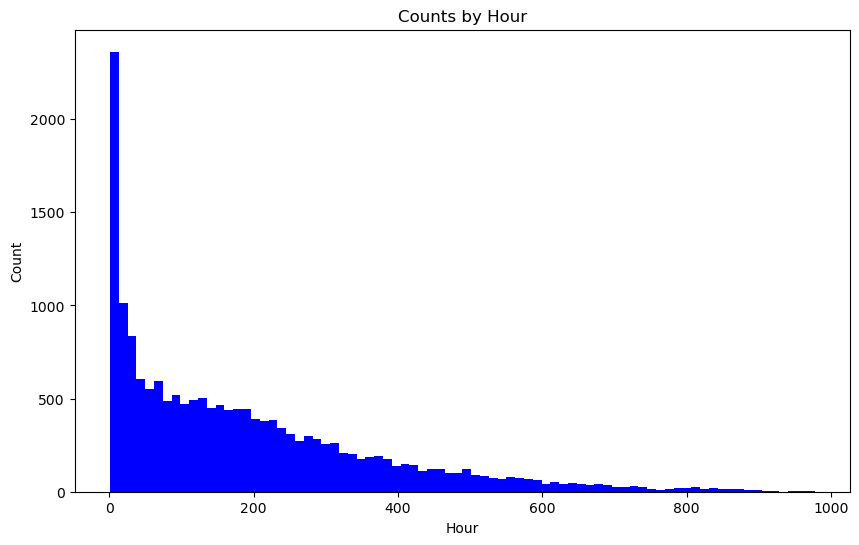

Result :

In a histogram, the height of every bar represents frequency. In this case,
our histogram shows the frequencies of every ridership count. For example,
if you look at the x-axis around 800, you’ll see bars that have a height close
to 0. This means that very few hours in our dataset had around 800 riders.
By contrast, at about 200 on the x-axis, you see higher bars, with height
closer to 500. This indicates that for close to 500 individual hours in our
data, ridership was close to 200


In [14]:
# A histogram showing the frequency of each ridership count
fig, ax = plt.subplots(figsize=(10,6))
# plt.hist(data, bins=5, color='blue', alpha=0.7)
plt.hist(hour['count'],bins =80,color='blue')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

print("""Result :\n\nIn a histogram, the height of every bar represents frequency. In this case,
our histogram shows the frequencies of every ridership count. For example,
if you look at the x-axis around 800, you’ll see bars that have a height close
to 0. This means that very few hours in our dataset had around 800 riders.
By contrast, at about 200 on the x-axis, you see higher bars, with height
closer to 500. This indicates that for close to 500 individual hours in our
data, ridership was close to 200""")

### Pair Plot
A pair plot is a graphical representation of scatter plots and histograms for pairs of variables in a dataset. It allows you to visualize the relationships between multiple pairs of variables in a single plot.

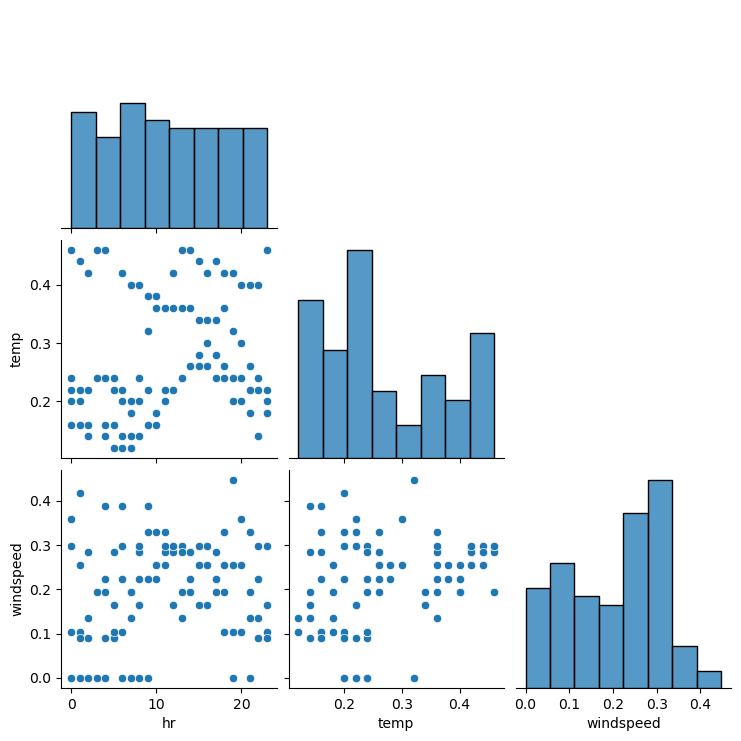

In [11]:
# Pair plots showing relationships among selected variables

thevariables=['hr','temp','windspeed']
hour_first100=hour.loc[0:100,thevariables]

# sns.pairplot(data, diag_kind='hist', markers='o', hue='species')

sns.pairplot(hour_first100, corner=True)

# The corner parameter in sns.pairplot() is a boolean value that specifies whether to plot the lower triangle of the pair plot matrix or only the diagonal plots. 
# When corner is set to True, only the diagonal plots are shown, and the off-diagonal plots are omitted, resulting in a corner plot.

plt.show()


### Correlations

Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. It indicates how much two variables change together, or how they vary in relation to each other. Correlation is commonly used in statistics and data analysis to assess the degree of association or dependence between variables.

The most common type of correlation is Pearson correlation, which measures the linear relationship between two continuous variables. Pearson correlation coefficient, denoted by the symbol "r", ranges from -1 to 1. A positive value of "r" (closer to 1) indicates a positive linear relationship, where as one variable increases, the other tends to increase as well. A negative value of "r" (closer to -1) indicates a negative linear relationship, where as one variable increases, the other tends to decrease. A value of "r" close to 0 indicates little to no linear relationship between the variables.

Correlation can also be used to assess the strength and direction of association between categorical variables using techniques such as point-biserial correlation or phi coefficient.

It's important to note that correlation does not imply causation. A high correlation between two variables does not necessarily imply that one variable causes the other. Correlation only indicates the strength and direction of the linear relationship between variables, and other factors may be involved in driving the observed association. Care should be taken to interpret correlation results in the context of the specific data and research question at hand.

#### Calculating Correlations

In [12]:
print(hour['casual'].corr(hour['registered']))
print("\n")
print(hour['temp'].corr(hour['hum']))


print("""
Result :\n
The Pearson correlation coefficient is a number that’s always between –1
and 1, and it’s often named with the variable r. It’s meant to describe the
relationship between two variables; its sign describes the type of
correlation, and its size describes the strength of the correlation. If the
correlation coefficient r is a positive number, our two variables are
positively correlated, and if r is a negative number, they’re negatively
correlated. If the correlation coefficient is 0, or very close to 0, we say that
the variables are uncorrelated.\n
In this case, the first line of this snippet calculates the correlation
coefficient describing the relationship between the casual and registered
variables in our data. For these variables, r is about 0.51, a positive number
that indicates a positive correlation.

""")

0.5066177004294643


-0.06988139105119368

Result :

The Pearson correlation coefficient is a number that’s always between –1
and 1, and it’s often named with the variable r. It’s meant to describe the
relationship between two variables; its sign describes the type of
correlation, and its size describes the strength of the correlation. If the
correlation coefficient r is a positive number, our two variables are
positively correlated, and if r is a negative number, they’re negatively
correlated. If the correlation coefficient is 0, or very close to 0, we say that
the variables are uncorrelated.

In this case, the first line of this snippet calculates the correlation
coefficient describing the relationship between the casual and registered
variables in our data. For these variables, r is about 0.51, a positive number
that indicates a positive correlation.




### Finding Correlations Between Variables

We can do more than calculate individual correlations between pairs of
variables. We can go further by creating a correlation matrix, which is a
matrix (or rectangular array) of numbers, each of whose elements is the
correlation coefficient measuring the relationship between two particular
variables. A correlation matrix will show the relationships among all of our
variables:

Correlation between casual riders and registered

In [15]:
thenames = ['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


### Heat Map

A heatmap is a graphical representation of data where values are displayed using colors to indicate intensity or density. Heatmaps are often used to visualize data in the form of a matrix or grid, where each cell represents a data point, and the color of the cell reflects the value of that data point.

Heatmaps are commonly used in various fields such as data analysis, statistics, biology, finance, and geography, among others. They can provide insights into patterns, trends, and relationships within the data, and are particularly useful for identifying areas of high or low concentration.

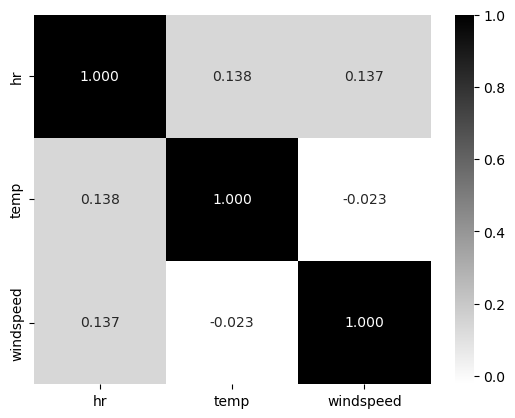

In [18]:
# sns.heatmap(data, cmap='coolwarm', annot=True, cbar=False)
sns.heatmap(cor_matrix,cmap='binary', 
            annot=True,
            fmt=".3f",
            xticklabels=thenames,
            yticklabels=thenames) # fmt=".3f" - After Decimal 3 fractions
plt.show()

**df_hm**: This is the input DataFrame that contains the data to be visualized in the heatmap.

**fmt="d"**: This specifies the format of the values displayed on the heatmap. In this case, it is set to "d", which represents integer values without any decimal places.

**cmap='binary'**: This sets the color map for the heatmap. In this example, it is set to 'binary', which represents a black and white color palette.

**linewidths=.5**: This parameter sets the width of the lines separating the heatmap cells. In this case, it is set to 0.5, indicating a thin line.

**vmin = 0**: This sets the minimum value for the color scale of the heatmap. Any value in the data below this threshold will be mapped to the lowest color in the color map.

These parameters can be adjusted to customize the appearance of the heatmap according to your specific needs. By changing the fmt parameter, you can control how the values are displayed on the heatmap, whether as integers, floats, or other formats. The cmap, linewidths, and vmin parameters can also be adjusted to modify the color palette, line width, and color scale of the heatmap, respectively. Additionally, you can further customize the appearance of the heatmap by passing other parameters to the sns.heatmap() function, as mentioned in the previous response. Refer to the seaborn documentation for a comprehensive list of available parameters and their usage.

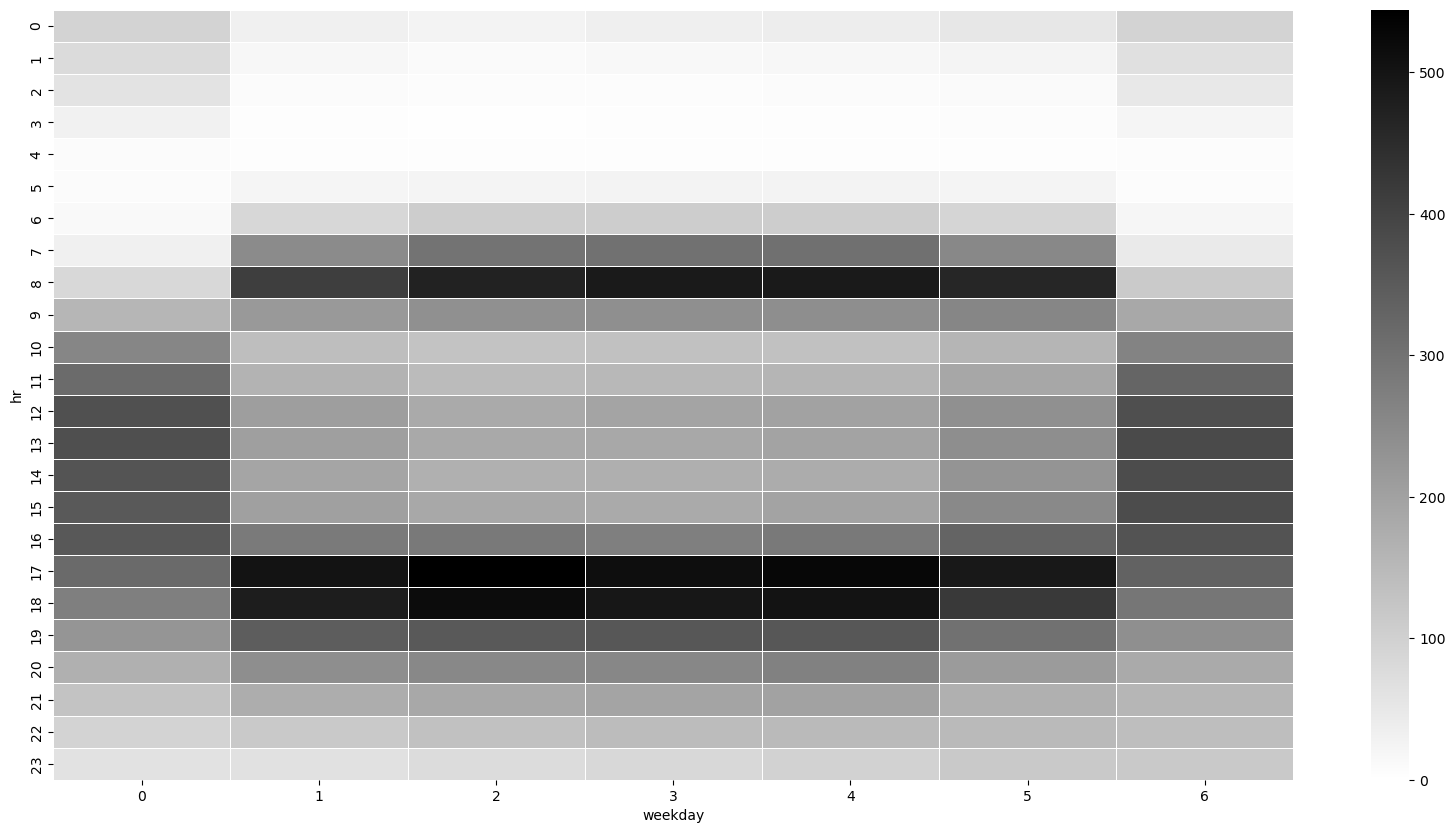


Result:


This heat map contains darker rectangles for hours that had more riders
and lighter rectangles for hours that had fewer riders. We can see
commuters who spike in activity around 8 AM and 5 PM. We can also see
weekend outings on Saturday and Sunday afternoons.



In [19]:
# Create a pivot table
df_hm =hour.pivot_table(index = 'hr',columns ='weekday',values ='count')

# Draw a heatmap
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm, fmt="e", cmap='binary',linewidths=.5, vmin = 0)
plt.show()

print("""
Result:\n\n
This heat map contains darker rectangles for hours that had more riders
and lighter rectangles for hours that had fewer riders. We can see
commuters who spike in activity around 8 AM and 5 PM. We can also see
weekend outings on Saturday and Sunday afternoons.
""")